# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data by subtracting the mean
    mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean

    # Compute the covariance matrix
    A = X_train_centered
    m, n = A.shape

    if m >= n: # More samples than features
        ATA = np.dot(A.T, A)
        eigvals, eigvecs = np.linalg.eigh(ATA)
        sorted_indices = np.argsort(eigvals)[::-1]
        eigvals = eigvals[sorted_indices]
        eigvecs = eigvecs[:, sorted_indices]
        singular_values = np.sqrt(np.maximum(eigvals, 0))

        V = eigvecs[:, :n_components]
        S = singular_values[:n_components]

        U = np.dot(A, V)
        U /= S

    else: # More features than samples
        AAT = np.dot(A, A.T)
        eigvals, eigvecs = np.linalg.eigh(AAT)
        sorted_indices = np.argsort(eigvals)[::-1]
        eigvals = eigvals[sorted_indices]
        eigvecs = eigvecs[:, sorted_indices]
        singular_values = np.sqrt(np.maximum(eigvals, 0))

        U = eigvecs[:, :n_components]
        S = singular_values[:n_components]

        V = np.dot(A.T, U)
        V /= S

    # Project the data onto the new feature space
    X_train_reduced = np.dot(U, np.diag(S))
    X_test_reduced = np.dot(X_test_centered, V)

    return X_train_reduced, X_test_reduced, V

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [5*k for k in range(1, 21)]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, X_test_Vh = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append({'n_components': n_components, 'accuracy': accuracy, 'training_time': training_time})

Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 0.7886 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 1.2102 seconds
Applying custom SVD with 15 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 15, Accuracy: 0.8424, Training time: 3.8161 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 2.7317 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8855, Training time: 6.7231 seconds
Applying custom SVD with 30 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.8922, Training time: 6.0143 seconds
Applying custom SVD with 35 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 35, Accuracy: 0.8999, Training time: 7.5159 seconds
Applying custom SVD with 40 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 40, Accuracy: 0.9022, Training time: 9.2760 seconds
Applying custom SVD with 45 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 45, Accuracy: 0.9064, Training time: 10.9105 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 14.0253 seconds
Applying custom SVD with 55 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 55, Accuracy: 0.9114, Training time: 20.0068 seconds
Applying custom SVD with 60 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 60, Accuracy: 0.9131, Training time: 16.4639 seconds
Applying custom SVD with 65 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 65, Accuracy: 0.9134, Training time: 19.2535 seconds
Applying custom SVD with 70 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 70, Accuracy: 0.9147, Training time: 19.2389 seconds
Applying custom SVD with 75 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 75, Accuracy: 0.9152, Training time: 25.3764 seconds
Applying custom SVD with 80 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 80, Accuracy: 0.9164, Training time: 30.1549 seconds
Applying custom SVD with 85 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 85, Accuracy: 0.9178, Training time: 34.2960 seconds
Applying custom SVD with 90 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 90, Accuracy: 0.9185, Training time: 36.7478 seconds
Applying custom SVD with 95 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 95, Accuracy: 0.9179, Training time: 40.7025 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 42.3088 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


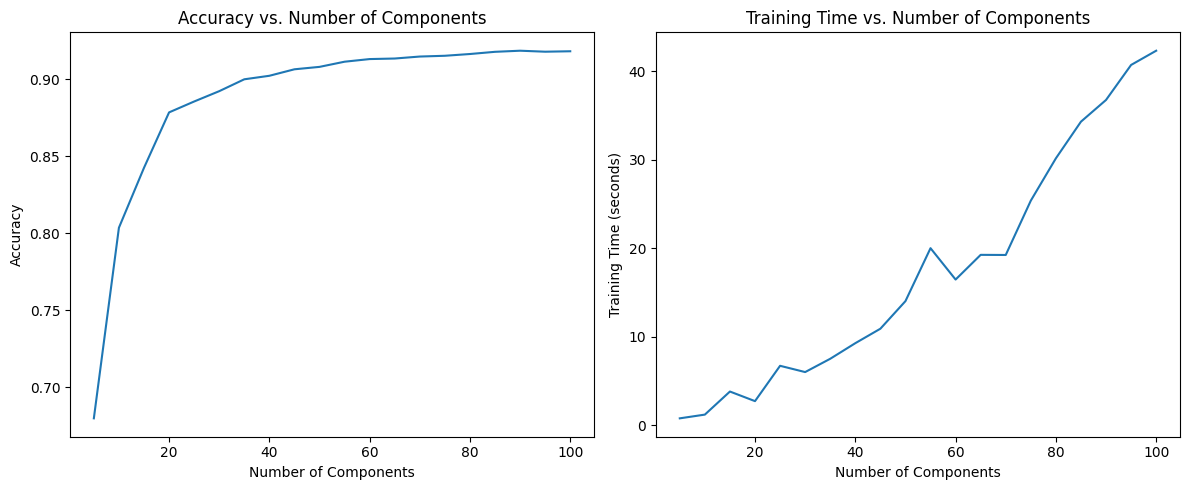

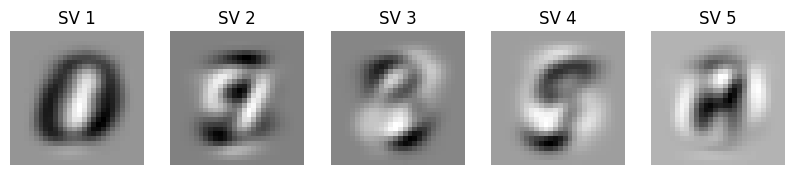

In [9]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies)
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(components, training_times)
plt.title('Training Time vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

# Plot the top 5 singular vectors
# Assuming X_test_Vh contains singular vectors as columns
singular_vectors = X_test_Vh.T[:5]  # Transpose to access singular vectors as rows

plt.figure(figsize=(10, 2))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(singular_vectors[i].reshape((28,28)), cmap='gray')
  plt.title(f'SV {i + 1}')
  plt.axis('off')
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [ ]:
# Significant dimensionality reduction results in faster training time but
# heavily sacrifices accuracy, whereas a higher number of components preserves
# more information which leads to higher accuracy but sacrifices training time.

# Eliminating less significant components can reduce noise and potentially
# improve model generalization. So too much reduction harms performance while
# too little offers minimal computational benefits.

# The sweet spot seems to be around 20-40 components where high accuracy is
# achieved while preserving training time.